# Chapter 20 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import collections

import matplotlib.pyplot as plt
import mlba
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib inline

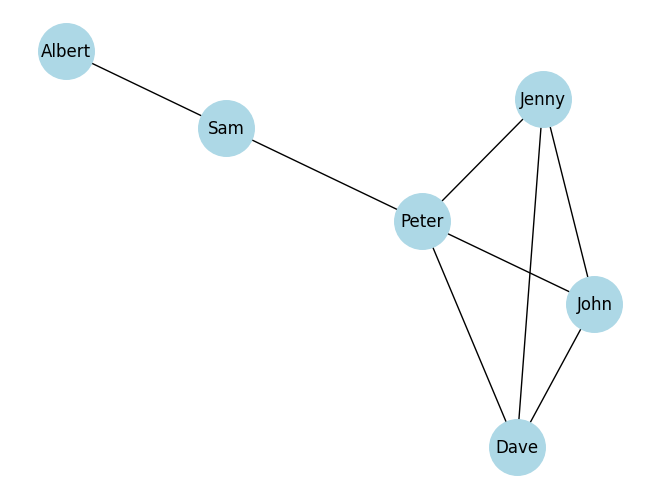

In [3]:
np.random.seed(123)  # for reproducibility
df = pd.DataFrame([
    ("Dave", "Jenny"), ("Peter", "Jenny"), ("John", "Jenny"),
    ("Dave", "Peter"), ("Dave", "John"), ("Peter", "Sam"),
    ("Sam", "Albert"), ("Peter", "John"),
], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

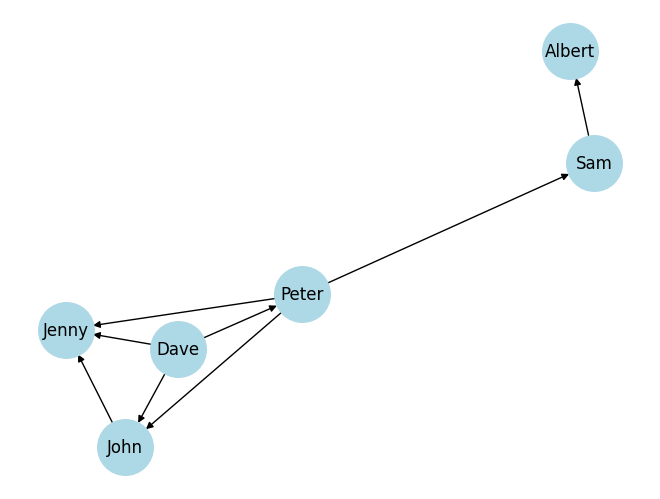

In [4]:
np.random.seed(1)  # for reproducibility
# use nx.DiGraph to create a directed network
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)

plt.show()

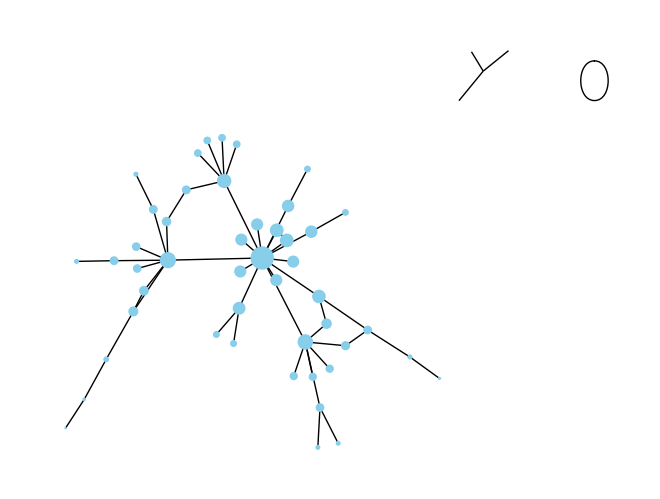

In [5]:
drug_df = mlba.load_data('drug.csv')

G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')

centrality = nx.eigenvector_centrality(G)
node_size = [400*centrality[n] for n in G.nodes()]
nx.draw(G, with_labels=False, node_color='skyblue', node_size=node_size)
plt.show()

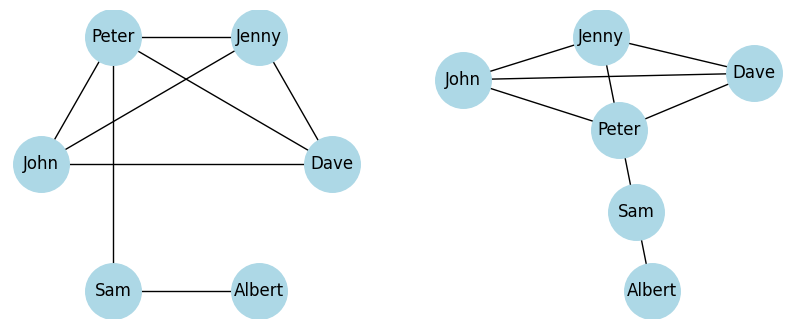

In [6]:
G = nx.from_pandas_edgelist(df, 'from', 'to')

plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

In [7]:
G = nx.from_pandas_edgelist(df, 'from', 'to')
G.degree()

DegreeView({'Dave': 3, 'Jenny': 3, 'Peter': 4, 'John': 3, 'Sam': 2, 'Albert': 1})

In [8]:
nx.closeness_centrality(G)

{'Dave': 0.625,
 'Jenny': 0.625,
 'Peter': 0.8333333333333334,
 'John': 0.625,
 'Sam': 0.625,
 'Albert': 0.4166666666666667}

In [9]:
nx.betweenness_centrality(G)

{'Dave': 0.0,
 'Jenny': 0.0,
 'Peter': 0.6000000000000001,
 'John': 0.0,
 'Sam': 0.4,
 'Albert': 0.0}

In [10]:
nx.eigenvector_centrality(G, tol=1e-2)

{'Dave': 0.47246979363344,
 'Jenny': 0.47246979363344,
 'Peter': 0.528716197637421,
 'John': 0.47246979363344,
 'Sam': 0.2105222549863287,
 'Albert': 0.08035200571997278}

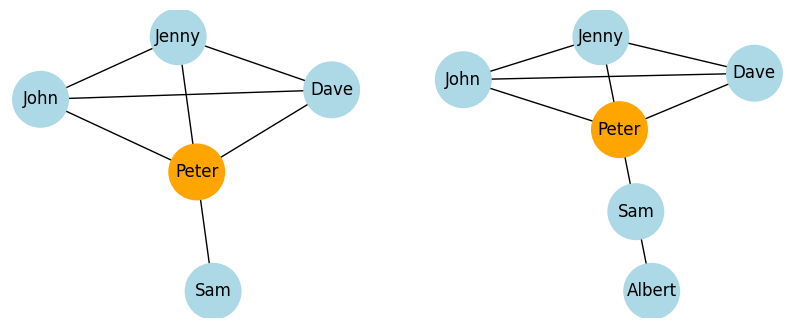

In [11]:
def plot_ego_graph(G_ego, pos):
    colors = ['orange' if node_name == 'Peter' else 'lightblue'
              for node_name in list(G_ego.nodes)]
    nx.draw(G_ego, pos=pos, with_labels=True, node_color=colors, node_size=1600)


# nx.ego_graph get Peter's 1-level ego network
G_ego_1 = nx.ego_graph(G, 'Peter')
# for a 2-level ego network set argument order = 2 in make_ego_graph().
G_ego_2 = nx.ego_graph(G, 'Peter', radius=2)

# use kamada_kawai_layout for both graphs
pos = nx.kamada_kawai_layout(G)
plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplot(121)
plot_ego_graph(G_ego_1, pos)
plt.subplot(122)
plot_ego_graph(G_ego_2, pos)
plt.show()

In [12]:
degreeCount = collections.Counter(d for node, d in G.degree())
degreeDistribution = [0] * (1 + max(degreeCount))
for degree, count in degreeCount.items():
    degreeDistribution[degree] = count
degreeDistribution

[0, 1, 1, 3, 1]

In [13]:
nx.density(G)

0.5333333333333333